#I. IMPORT REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

#II. UPLOAD AND PREPROCESSING DATA

In [ ]:
train = pd.read_csv("train.csv")

In [ ]:
columns_to_keep = ['id', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium']
df_origin = train[columns_to_keep]

In [ ]:
df = df_origin.copy()
df['Vehicle_Age'] = df['Vehicle_Age'].replace({'< 1 Year': 1, '1-2 Year': 2, '> 2 Years': 3})
df['Vehicle_Damage'] = df['Vehicle_Damage'].replace({'No': 0, 'Yes': 1})

#III. APPLYING ELBOW THE FIRST TIME

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

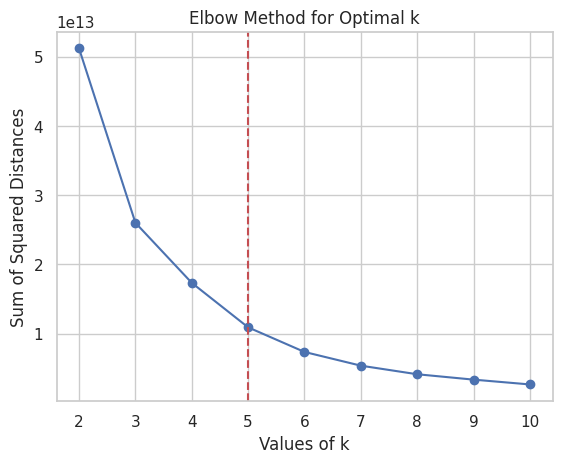

In [ ]:
data = df.loc[:, ['Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium']]
elbow_scores = dict()
range_of_k = range(2, 11)
for k in range_of_k :
 untrained_model = KMeans(n_clusters=k, random_state=42)
 trained_model = untrained_model.fit(data)
 elbow_scores[k] = trained_model.inertia_

plt.plot(elbow_scores.keys(), elbow_scores.values())
plt.scatter(elbow_scores.keys(), elbow_scores.values())
plt.axvline(x=5, color='r', linestyle='--')
plt.xlabel("Values of k")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method for Optimal k")
plt.show()

#III. KMEANS THE FIRST TIME AND RESULTS

In [ ]:
model = KMeans(n_clusters=5, random_state=42)
model.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [ ]:
df['Cluster_Id'] = model.labels_

Text(0.5, 1.0, 'The Number of Members in Each Cluster')

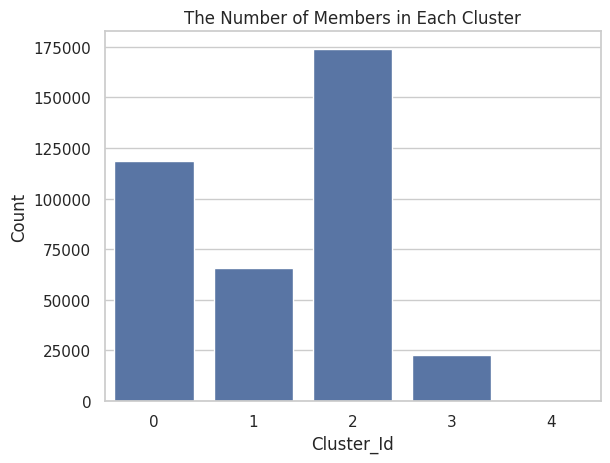

In [ ]:
sns.countplot(x='Cluster_Id', data=df)
plt.ylabel("Count")
plt.title("The Number of Members in Each Cluster")

In [ ]:
dbi_score = davies_bouldin_score(data, df['Cluster_Id'])
print(f'Davies-Bouldin Index: {dbi_score}')

Davies-Bouldin Index: 0.4696468184460829


In [ ]:
chi_score = calinski_harabasz_score(data, df['Cluster_Id'])
print(f'Calinski-Harabasz Index: {chi_score}')

Calinski-Harabasz Index: 890686.3255470651


In [ ]:
result = df.groupby('Cluster_Id').agg({'Annual_Premium': ['mean', 'min', 'max', 'count']})
result

Annual_Premium                            
                     mean       min       max   count
Cluster_Id                                           
0            41862.710992   35239.0   53241.0  118668
1             2742.498405    2630.0   15689.0   65507
2            28646.991217   15690.0   35238.0  173967
3            64693.839637   53242.0  169127.0   22817
4           274643.053333  170402.0  540165.0     150

* The Elbow analysis indicated that k = 5 was the optimal number of clusters, as the reduction in the total squared distance between points and their cluster centers began to diminish beyond this point.
* However, an issue emerged with an uneven distribution among clusters, with two significantly smaller than the others, raising concerns about the representativeness and accuracy of these smaller groups.
* The decision was made to merge the smallest clusters into the remaining ones, aiming for three main customer groups using K-Means, each defined by stronger similarity in predetermined characteristics.

#IV. K-MEANS THE SECOND TIME AND RESULTS

In [ ]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
df['Cluster_Id'] = model.labels_

Text(0.5, 1.0, 'The Number of Members in Each Cluster of Three Clusters')

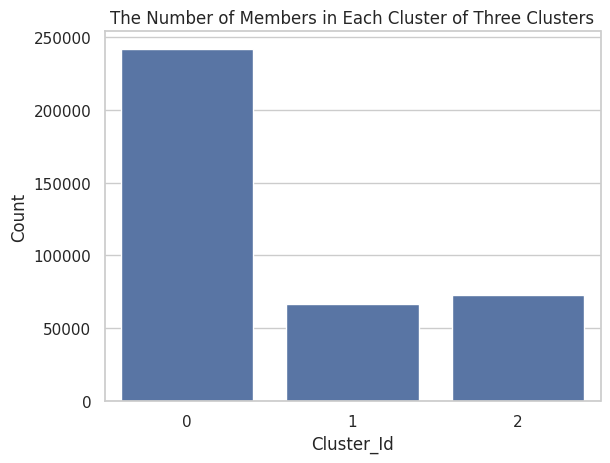

In [ ]:
sns.countplot(x='Cluster_Id', data=df)
plt.ylabel("Count")
plt.title("The Number of Members in Each Cluster of Three Clusters")

<Axes: xlabel='Cluster_Id', ylabel='count'>

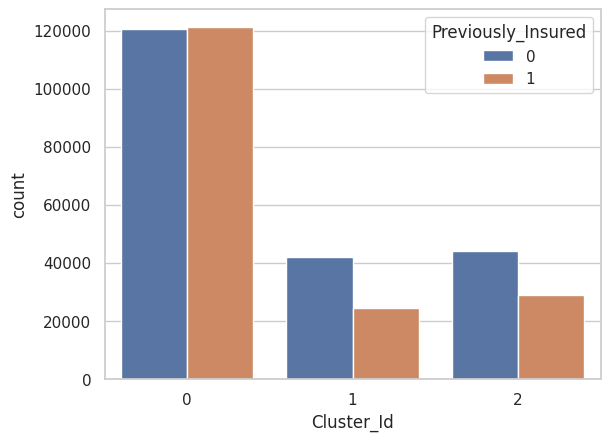

In [ ]:
sns.countplot(x='Cluster_Id', hue='Previously_Insured', data=df)

<Axes: xlabel='Cluster_Id', ylabel='count'>

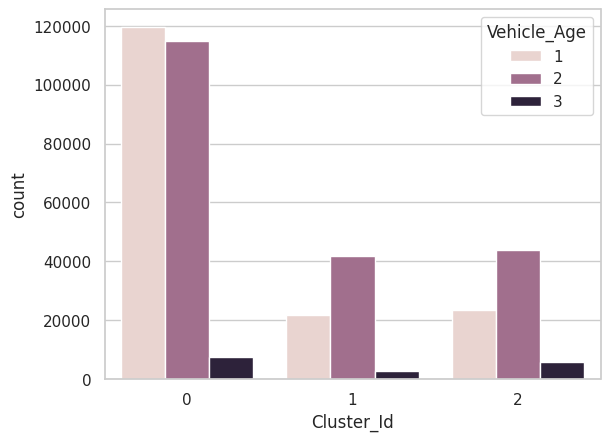

In [ ]:
sns.countplot(x='Cluster_Id', hue='Vehicle_Age', data=df)

<Axes: xlabel='Cluster_Id', ylabel='count'>

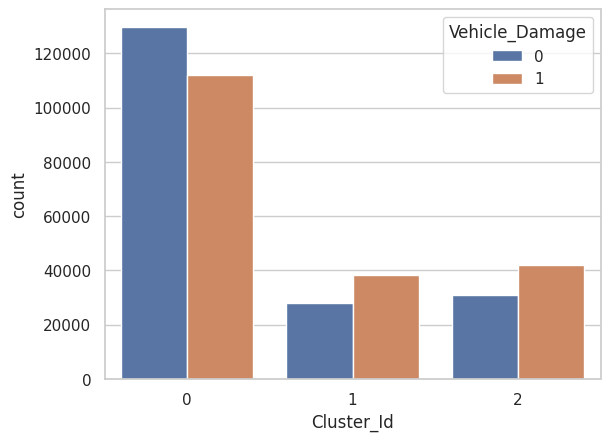

In [ ]:
sns.countplot(x='Cluster_Id', hue='Vehicle_Damage', data=df)

In [ ]:
dbi_score = davies_bouldin_score(data, df['Cluster_Id'])
print(f'Davies-Bouldin Index: {dbi_score}')

Davies-Bouldin Index: 0.47102266017429956


In [ ]:
chi_score = calinski_harabasz_score(data, df['Cluster_Id'])
print(f'Calinski-Harabasz Index: {chi_score}')

Calinski-Harabasz Index: 636569.4631389398


In [ ]:
result = df.groupby('Cluster_Id').agg({'Annual_Premium': ['mean', 'min', 'max', 'count']})
result

Annual_Premium                           
                     mean      min       max   count
Cluster_Id                                          
0            31446.886981  17188.0   42138.0  241827
1             2912.976164   2630.0   17186.0   66328
2            52779.089947  42139.0  540165.0   72954

* Further analysis and visualization revealed the Annual Premium variable as crucial in Customer Segmentation, leading to the classification into Common, VIP, and VVIP groups based on insurance spending levels.
* However, the VIP group's unusually large size compared to the others prompted a reapplication of K-Means within this group alone, resulting in four distinct sub-groups, named VIP #1, VIP #2, VIP #3, and VIP #4. This subdivision offered a more nuanced view of this important segment, with a balanced distribution among the new sub-groups, demonstrating the effectiveness of the Elbow method in data-driven decision-making.

#V. DIVIDING THE LARGEST CLUSTER INTO SUB CLUSTERS

In [ ]:
largest_cluster_id = df['Cluster_Id'].value_counts().idxmax()
largest_cluster_data = df[df['Cluster_Id'] == largest_cluster_id][['Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium']]

## 5.1 Elbow

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

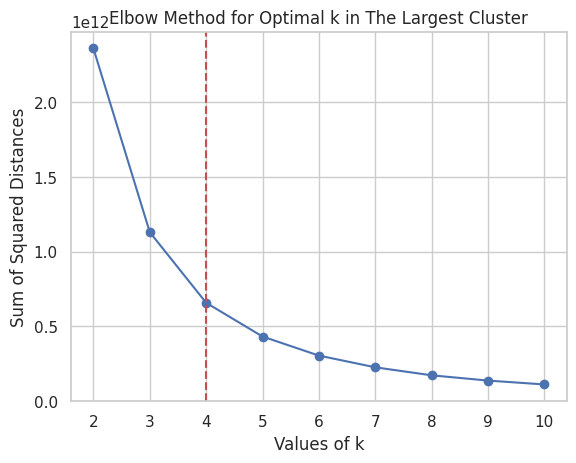

In [ ]:
elbow_scores_largest = dict()
range_of_k_largest = range(2, 11)
for k in range_of_k_largest:
    kmeans_largest = KMeans(n_clusters=k, random_state=42)
    kmeans_largest.fit(largest_cluster_data)
    elbow_scores_largest[k] = kmeans_largest.inertia_

plt.plot(elbow_scores_largest.keys(), elbow_scores_largest.values())
plt.scatter(elbow_scores_largest.keys(), elbow_scores_largest.values())
plt.axvline(x=4, color='r', linestyle='--')
plt.xlabel('Values of k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k in The Largest Cluster')
plt.show()

## 5.2 K-Means

In [ ]:
model_sub = KMeans(n_clusters=4, random_state=42)
sub_clusters = model_sub.fit_predict(largest_cluster_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
max_existing_label = df['Cluster_Id'].max()
new_labels = sub_clusters + (max_existing_label + 1)
df.loc[largest_cluster_data.index, 'Cluster_Id'] = new_labels

## 5.3 Data Analysis

In [ ]:
cluster_names = {
    1: "Common",
    2: "VVIP",
    3: "VIP #4",
    4: "VIP #2",
    5: "VIP #1",
    6: "VIP #3"
}

In [ ]:
df['Cluster_Id'] = df['Cluster_Id'].replace(cluster_names)

<Axes: xlabel='Cluster_Id', ylabel='count'>

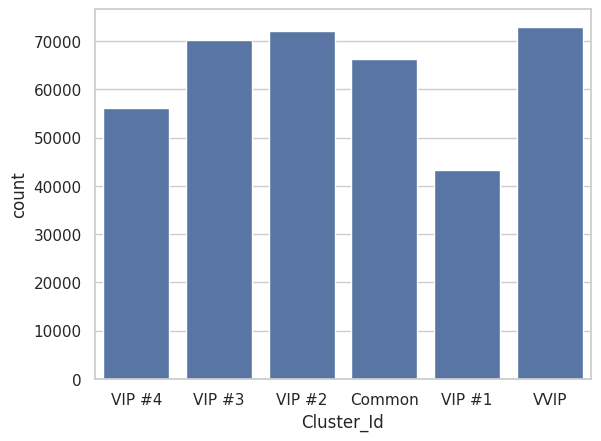

In [ ]:
sns.countplot(x='Cluster_Id', data=df)

<Axes: xlabel='Cluster_Id', ylabel='count'>

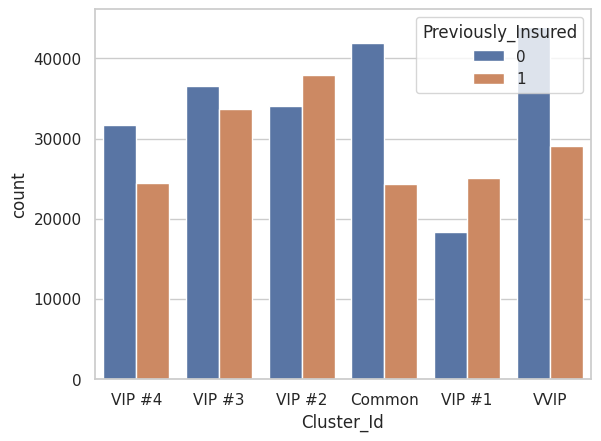

In [ ]:
sns.countplot(x='Cluster_Id', hue='Previously_Insured', data=df)

<Axes: xlabel='Cluster_Id', ylabel='count'>

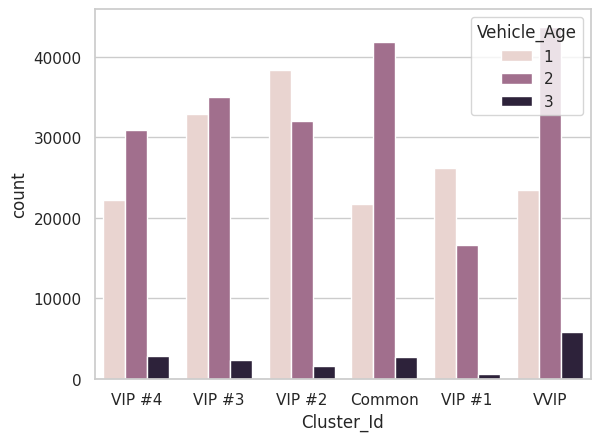

In [ ]:
sns.countplot(x='Cluster_Id', hue='Vehicle_Age', data=df)

<Axes: xlabel='Cluster_Id', ylabel='count'>

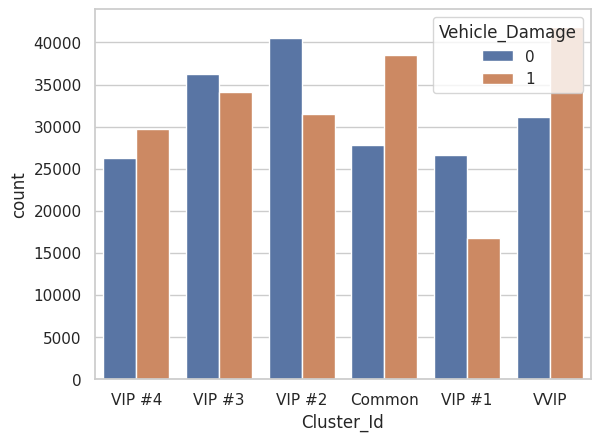

In [ ]:
sns.countplot(x='Cluster_Id', hue='Vehicle_Damage', data=df)

* Analysis of Previously Insured, Vehicle Age, and Vehicle Damage variables showed clear differentiation among the VIP sub-groups, each exhibiting unique insurance buying behaviors. This not only highlighted the diversity within the VIP group but also provided valuable insights for tailoring insurance strategies and products.



## 5.4 Results

In [ ]:
dbi_score = davies_bouldin_score(data, df['Cluster_Id'])
print(f'Davies-Bouldin Index: {dbi_score}')

Davies-Bouldin Index: 0.533367285250291


In [ ]:
chi_score = calinski_harabasz_score(data, df['Cluster_Id'])
print(f'Calinski-Harabasz Index: {chi_score}')

Calinski-Harabasz Index: 378917.49557012937


* Quality evaluation metrics, Davies-Bouldin Index (DBI) and Calinski-Harabasz Index (CHI), were used to quantify clustering effectiveness, showing that the clusters were well-defined, compact, and separate from each other. The slight changes in DBI and the decrease in CHI did not necessarily indicate a decline in clustering quality but rather suggested an adjustment in clustering to more accurately reflect the data's natural structure. This refinement process, despite the CHI decrease, still resulted in clusters with significant separation and densely packed data points, indicating effective grouping and organization within the clusters. This adjustment was part of fine-tuning the clustering process, aiming to more accurately capture the characteristics and natural structure of the data, thereby providing more insightful and useful information for the business.

In [ ]:
result = df.groupby('Cluster_Id').agg({'Annual_Premium': ['mean', 'min', 'max', 'count']})
result

Annual_Premium                          
                     mean      min       max  count
Cluster_Id                                         
Common        2912.976164   2630.0   17186.0  66328
VIP #1       23091.632412  17188.0   25833.0  43410
VIP #2       28563.687332  25834.0   31072.0  72038
VIP #3       33576.804361  31073.0   36261.0  70313
VIP #4       38949.484928  36262.0   42138.0  56066
VVIP         52779.089947  42139.0  540165.0  72954

In [ ]:
df.head()

,id,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Cluster_Id
0,1,0,3,1,40454.0,VIP #4
1,2,0,2,0,33536.0,VIP #3
2,3,0,3,1,38294.0,VIP #4
3,4,1,1,0,28619.0,VIP #2
4,5,1,1,0,27496.0,VIP #2


In [ ]:
df.to_csv("cluster_result.csv", index=False)